# Trihexagonal Magic Figure

This Jupyter notebook performs a complete enumeration of magic labelings of the **trihexagonal figure**, a structure appearing in generalized magic-figure theory and related combinatorial designs.

---

## Definition

For a positive integer $n$, the trihexagonal figure of order $n$ has
$
V(n) = \frac{3}{2} n(n+1)
$
vertices. A **trihexagonal magic figure of order $n$** is a labeling of these vertices with the **distinct integers**
$
1, 2, \dots, V(n)
$
such that

- **Every triangular face** has constant sum
  $
  T(n) = \frac{3}{2}\,\bigl(V(n) + 1\bigr),
  $
- **Every hexagonal face** has constant sum
  $
  H(n) = 3\,\bigl(V(n) + 1\bigr).
  $

Throughout this notebook, labelings are counted **up to rotations, reflections, and global mirror symmetries** of the trihexagonal figure (i.e., up to the full dihedral symmetry group of the outer triangle).

---

## Orders considered in this notebook

### Order $n = 1$ (trivial case)

The order-1 trihexagonal figure is degenerate / trivial.  
We record it here for completeness and do not treat it in detail.

---

### Order $n = 2$

Here $V(2) = \frac{3}{2}\cdot 2\cdot 3 = 9$, so we use the integers $1$ to $9$ exactly once.

All small triangles and the outer triangle have sum $T(2) = 15$, while the unique hexagon has sum $H(2) = 30$.

In this case:

- There are **80 distinct labelings** satisfying the magic conditions with the additional ordering constraint
  $
  a_{33} > a_{00} > a_{03}
  $
  used to fix the orientation.
- Up to swapping, in each small triangle, the two vertices that also lie on the hexagon, there are **10 base solutions**, each generating $8$ labelings, giving
  $
  10 \times 8 = 80
  $
  in total.

---

### Orders with $n \equiv 0 \text{ or } -1 \pmod{4}$

For orders $n \equiv 0 \pmod{4}$ or $n \equiv -1 \pmod{4}$ (that is, $n \equiv 3 \pmod{4}$), we show that **no trihexagonal magic figure exists* 



The reason is that in cases $V(n)$ is even, so the required triangular-face sum $T(n)=\frac{3}{2}(V(n)+1)$ would be a **half-integer**, but $T(n)$ must be a natural number under the labeling constraints, yielding a contradiction.

---

### Order $n = 5$

Here $V(5) = \frac{3}{2}\cdot 5\cdot 6 = 45$, so we use the integers $1$ to $45$ exactly once.

- Every triangular face has sum
  $
  T(5) = \frac{3}{2}\,(45 + 1) = 69,
  $
- Every hexagonal face has sum
  $
  H(5) = 3\,(45 + 1) = 138.
  $
-  In order-5 notebook, we computed:

- the number of **base solutions** (inequivalent up to the swaps of certain vertex pairs) 6976, and  
- the **total number of magic labelings** 55808, obtained by applying these swaps to each base solution.

(Exact counts are recorded in the corresponding section.)

---

### Order $n = 6$

The existence (or non-existence) of trihexagonal magic figures of order $n = 6$ remains **unsolved** in this notebook.  
We state this as an open case.

---

### Orders $n \ge 9$

For larger orders $n \ge 9$, we **conjecture** that no trihexagonal magic figure exists, but this remains an open problem here.  
We leave the general existence problem for $n \ge 6$ as a **future research question**.


The heuristic reason is as follows. Let V(n) be the number of vertices, and let C(n) be the number of independent constraints coming from all triangular and hexagonal face sums. If we treat these constraints as approximately independent, then a random labeling of the vertices with the integers 1 to V(n) has an expected number of solutions roughly equal to:

    expected count ≈ V(n)! / V(n)^{C(n)}

For n ≥ 9, this quantity becomes far smaller than 1, meaning that the probability of any labeling satisfying all constraints is extremely low. This motivates the conjecture that no trihexagonal magic figure exists for n ≥ 9.



In [4]:
import itertools

count = 0
solutions = []

for a00, a01, a02, a03, a11, a13, a22, a23, a33 in itertools.permutations(range(1, 10), 9):
    if a22 + a23 + a33 != 15:
        continue
    if a00 + a11 + a01 != 15:
        continue
    if a02 + a03 + a13 != 15:
        continue
    if a00 + a33 + a03 != 15:
        continue
    if not (a33 > a00 > a03):
        continue

    count += 1
    solutions.append((a00, a01, a02, a03, a11, a13, a22, a23, a33))

print("for order 2, number of solutions =", count)
# -> 80
#\footnote{Up to the symmetry that swaps, in each small triangle,
#the two vertices that also belong to the hexagon, there are
#$10$ base solutions. Each of them produces $8$ labelings
#under these swaps, so the total number of labelings is
#$10 \times 8 = 80$.}

for order 2, number of solutions = 80


A(n)=[1,80,0,0,55808,?,0,0,?]

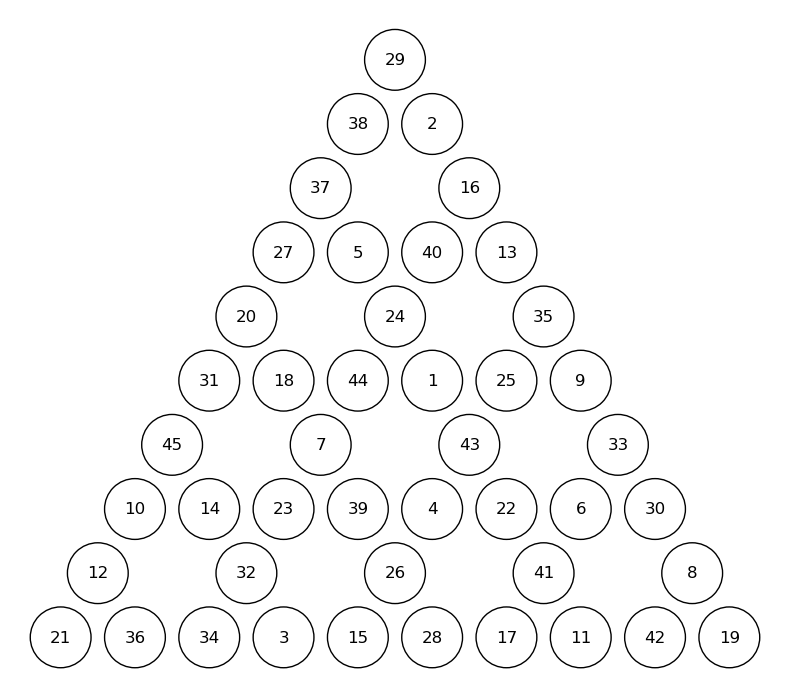

In [6]:
import matplotlib.pyplot as plt

rows = [
    [29],
    [38,2],
    [37,-1,16],
    [27,5,40,13],
    [20,-1,24,-1,35],
    [31,18,44,1,25,9],
    [45,-1,7,-1,43,-1,33],
    [10,14,23,39,4,22,6,30],
    [12,-1,32,-1,26,-1,41,-1,8],
    [21,36,34,3,15,28,17,11,42,19]
]

radius = 0.9
x_spacing = 2.2
y_spacing = 1.9

fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.set_aspect("equal")
ax.axis("off")

max_len = max(len(r) for r in rows)

xs = []
ys = []

for ridx, row in enumerate(rows):
    offset = (max_len - len(row)) * x_spacing / 2
    for cidx, val in enumerate(row):
        if val == -1:
            continue
        x = offset + cidx * x_spacing
        y = -ridx * y_spacing

        xs.append(x)
        ys.append(y)

        circle = plt.Circle((x, y), radius, fill=False, linewidth=1)
        ax.add_patch(circle)
        ax.text(x, y, str(val), ha='center', va='center', fontsize=12)

# ✔ 축 범위를 데이터에 딱 맞춰 자동 조정
margin = 1.5
ax.set_xlim(min(xs) - margin, max(xs) + margin)
ax.set_ylim(min(ys) - margin, max(ys) + margin)

plt.tight_layout()
plt.show()
